In [ ]:
# @title Mounting Drive
# Mount Drive
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title Building Vocab
import json
import os

def build_vocab_from_files(input_files,folderpath, vocab_file='vocab.json'):
    """
    Build a vocabulary from multiple text files and save it as a JSON file.

    Parameters:
    - input_files (list of str): List of paths to the input text files.
    - vocab_file (str): Filename for saving the vocabulary as a JSON file.

    Returns:
    - vocab (dict): Dictionary with words as keys and their corresponding indices as values.
    """
    vocab = {}
    current_index = 0

    for file_path in input_files:
        if os.path.isfile(folderpath + file_path):
            with open(folderpath + file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    # Tokenize each line into words
                    tokens = line.strip().lower().replace('.', '').split()

                    # Update the vocabulary with new words
                    for token in tokens:
                        if token not in vocab:
                            vocab[token] = current_index
                            current_index += 1
            print(f"File {folderpath+file_path} is done added in vocab.")
        else:
            print(f"File {folderpath+file_path} not found. Skipping.")

    # Save the vocabulary to a JSON file
    with open(vocab_file, 'w', encoding='utf-8') as f:
        json.dump(vocab, f, ensure_ascii=False, indent=4)

    print(f"Vocabulary saved to {vocab_file}")
    return vocab

all_files = [ 'final_processed_chunk_number_1.txt','final_processed_chunk_number_2.txt',
 'final_processed_chunk_number_3.txt', 'final_processed_chunk_number_4.txt',
 'final_processed_chunk_number_5.txt', 'final_processed_chunk_number_6.txt',
 'final_processed_chunk_number_7.txt', 'final_processed_chunk_number_8.txt',
 'final_processed_chunk_number_9.txt','final_processed_chunk_number_10.txt',
 'final_processed_chunk_number_11.txt', 'final_processed_chunk_number_12.txt',
 'final_processed_chunk_number_13.txt', 'final_processed_chunk_number_14.txt',
 'final_processed_chunk_number_16.txt', 'final_processed_chunk_number_15.txt',
 'final_processed_chunk_number_17.txt', 'final_processed_chunk_number_18.txt',
 'final_processed_chunk_number_19.txt']

folderpath = '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/'
# vocab = build_vocab_from_files(all_files,folderpath)

In [ ]:
# @title Read the Vocab
# read the vocab from jason

import json

def load_vocab_from_json(vocab_file='vocab.json'):
  """
  Load the vocabulary from a JSON file.

  Parameters:
  - vocab_file (str): Filename of the JSON file containing the vocabulary.

  Returns:
  - vocab (dict): Dictionary with words as keys and their corresponding indices as values.
  """
  with open(vocab_file, 'r', encoding='utf-8') as f:
      vocab = json.load(f)
  return vocab

In [ ]:
vocab_final = load_vocab_from_json("/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/vocab_file.json")
len(vocab_final)

2313873

In [ ]:
# @title
# Combine index and count into a single dictionary
# vocab_with_count = sequential_word_count(all_files, folderpath, vocab_final)
# vocab_with_count_json = {
#     word: {
#         "index": index,
#         "count": vocab_with_count.get(word, 0)
#     } for word, index in vocab_final.items()
# }

# # Save the vocabulary with counts to a JSON file
# with open("/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/vocab_with_count.json", "w") as output_file:
#     json.dump(vocab_with_count_json, output_file, indent=4)

# print("Vocabulary with count saved to '/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/vocab_with_count.json'")

Vocabulary with count saved to '/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/vocab_with_count.json'


In [ ]:
# @title Top 10 according to count
# Sort the vocabulary by count in descending order
sorted_vocab = sorted(vocab_with_count_json.items(), key=lambda item: item[1]['count'], reverse=True)

# Get the top 10 words
top_10_words = sorted_vocab[:10]

# Print the top 10 words and their counts
for word, data in top_10_words:
    print(f"Word: {word}, Count: {data['count']}")


Word: patients, Count: 726663
Word: cells, Count: 484544
Word: also, Count: 476880
Word: covid19, Count: 437144
Word: study, Count: 406030
Word: data, Count: 389701
Word: virus, Count: 381494
Word: infection, Count: 373644
Word: using, Count: 357903
Word: used, Count: 346770


In [ ]:
# @title
# # Save the new vocabulary to a JSON file
# with open("/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/new_vocab_without_stopwords.json", "w") as output_file:
#     json.dump(new_vocab, output_file, indent=4)

# print("New vocabulary without stop words saved to '/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/new_vocab_without_stopwords.json'")

## (b) Try to limit the vocabulary size to ~7K to compute the word embedding.

In [ ]:
# Get the top 10 words
top_7000_words = sorted_vocab[:7000]

for word, data in top_7000_words:
    print(f"Word: {word}, Count: {data['count']}")

# Add a new index based on the sorted position
for new_index, item in enumerate(top_7000_words):
    item[1]['new_index'] = new_index

Streaming output truncated to the last 5000 lines.
Word: involve, Count: 10757
Word: strength, Count: 10744
Word: bilateral, Count: 10743
Word: antigenic, Count: 10741
Word: chains, Count: 10736
Word: neonatal, Count: 10728
Word: lesion, Count: 10726
Word: operation, Count: 10719
Word: missing, Count: 10705
Word: positively, Count: 10684
Word: marrow, Count: 10684
Word: directed, Count: 10680
Word: deviation, Count: 10673
Word: subjected, Count: 10673
Word: reveal, Count: 10664
Word: determining, Count: 10663
Word: minimize, Count: 10657
Word: experts, Count: 10656
Word: kong, Count: 10649
Word: influenced, Count: 10645
Word: companies, Count: 10630
Word: neutralization, Count: 10622
Word: endemic, Count: 10611
Word: scan, Count: 10609
Word: centre, Count: 10605
Word: urgent, Count: 10605
Word: decreasing, Count: 10600
Word: tnfα, Count: 10595
Word: evident, Count: 10581
Word: interface, Count: 10577
Word: shape, Count: 10573
Word: hour, Count: 10562
Word: easy, Count: 10561
Word: empi

In [ ]:
top_7000_words[6999]

('circles', {'index': 13685, 'count': 1936, 'new_index': 6999})

# Creating the Final Vocabulary for Co-occurrence Frequncy Matrix
## Objective
To construct the final vocabulary for generating a co-occurrence matrix, we filter the top 7000 most frequent words based on their occurrence in the dataset. This ensures that only the most relevant words are included in the matrix, reducing dimensionality and computational complexity.

## Steps Involved

### 1. **Counting Word Frequencies**
   - Traverse through each file in the dataset.
   - Tokenize each line and count the occurrences of each word using a `Counter` object.
   - Apply a word size threshold (e.g., words with fewer than 3 characters are ignored due to et al kind of words).

### 2. **Selecting the Top 7000 Words**
   - After counting, the words are sorted by their frequency in descending order.
   - The top 7000 most frequent words are selected to create the final vocabulary.

### 3. **Creating the Final Vocabulary**
   - Assign a unique index (`new_index`) to each of the selected words.
   - The final vocabulary (`final_vocab_for_coo_mat`) is a dictionary where each word maps to its `new_index` and additional metadata, such as its frequency.

### 4. **Using the Final Vocabulary**
   - This vocabulary is then used to convert text data into token lists, where each word in the text is represented by its corresponding `new_index`.
   - These token lists will be  utilized to generate the co-occurrence matrix.

In [ ]:
final_voacb_for_coo_mat = {}
for word, data in top_7000_words:
  final_voacb_for_coo_mat[word] = data

In [ ]:
final_voacb_for_coo_mat["circles"]

{'index': 13685, 'count': 1936, 'new_index': 6999}

In [ ]:
# # Save the new vocabulary to a JSON file
# with open("/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/final_voacb_for_coo_mat.json", "w") as output_file:
#     json.dump(final_voacb_for_coo_mat, output_file, indent=4)

# print("New vocabulary without stop words saved to '/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/final_voacb_for_coo_mat.json'")

New vocabulary without stop words saved to '/content/drive/MyDrive/Colab Notebooks/SEM 3/NLP/Final_processed_chunks/final_voacb_for_coo_mat.json'


In [ ]:
final_voacb_for_coo_mat = load_vocab_from_json('/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_voacb_for_coo_mat.json')

In [ ]:
len(final_voacb_for_coo_mat)

7000

# Creating the Frequncy Co-occurrence Matrix


## Process Overview

### 1. **Function: `process_files_and_sum_matrices_sequentially`**
   This function processes multiple text files, generates co-occurrence matrices for each file, and sums them together into a final co-occurrence matrix.

   **Parameters:**
   - `file_paths`: A list of file paths to be processed.
   - `vocab`: A dictionary mapping words to indices, representing the final vocabulary.
   - `window_size`: The size of the context window around each word, defining the range of word co-occurrence.
   - `vocab_size`: The size of the vocabulary, representing the dimensions of the co-occurrence matrix.

   **Returns:**
   - The final summed co-occurrence matrix as a sparse CSR matrix.

   **Steps:**
   1. **Initialize Final Matrix:**
      - A sparse co-occurrence matrix of size `(vocab_size, vocab_size)` is initialized. This matrix will be used to sum the co-occurrence matrices of individual files.

   2. **Process Each File Sequentially:**
      - For each file in `file_paths`, the function:
        - **Generates Token List:** Calls the `parallel_file_processing` function to convert each line of the file into a list of token indices based on the provided vocabulary.
        - **Generate Co-occurrence Matrix:** Uses `parallel_cooccurrence_update` to create a co-occurrence matrix from the token list.
        - **Sum Matrices:** Adds the co-occurrence matrix to the `final_matrix`.

   3. **Return Final Matrix:**
      - After processing all files, the function returns the `final_matrix`, which contains the summed co-occurrence values for all files.

### 2. **Supporting Function: `parallel_file_processing`**
   This function processes a single file in parallel, converting its lines into token index lists based on the provided vocabulary.

   **Steps:**
   1. **Read File:**
      - Reads the content of the file and splits it into lines.
   
   2. **Parallel Processing of Lines:**
      - Uses `ProcessPoolExecutor` to process each line in parallel using the `process_line` function.
      - Converts each word in a line to its corresponding index if it exists in the vocabulary and meets the word size threshold.

   3. **Return Token Lists:**
      - Returns a list of token index lists for the entire file.

### 3. **Supporting Function: `process_line`**
   This function processes a single line of text by converting words to their corresponding indices in the vocabulary.

   **Steps:**
   1. **Tokenization and Filtering:**
      - Splits the line into tokens (words) and filters them based on the word size threshold.
      - Converts each word to its corresponding index using the `vocab` dictionary.
   
   2. **Return Indices:**
      - Returns a list of indices representing the filtered words.

### 4. **Execution:**
The co-occurrence matrix was created by calling the `process_files_and_sum_matrices_sequentially` function with the following parameters:




In [ ]:
# @title
from concurrent.futures import ProcessPoolExecutor
import os

def process_line(line, vocab, word_size_threshold=3):
    """
    Processes a single line by filtering words and converting them to indices based on the provided vocabulary.

    Args:
        line: A line of text to process.
        vocab: A dictionary mapping words to indices.
        word_size_threshold: Minimum length of word to be considered.

    Returns:
        A list of indices representing the filtered words in the line. Words not in vocabulary or below the threshold are represented by -1.
    """
    tokens = line.strip().split()
    return [vocab[token]["new_index"] if token in vocab and len(token) > word_size_threshold else -1 for token in tokens]

def parallel_file_processing(file_path, vocab, word_size_threshold=3, num_workers=None):
    """
    Reads a file and processes its lines in parallel to convert tokens to indices based on the provided vocabulary.

    Args:
        file_path: Path to the file to be processed.
        vocab: A dictionary mapping words to indices.
        word_size_threshold: Minimum length of word to be considered.
        num_workers: Number of parallel workers to use. If None, defaults to the number of available CPU cores.

    Returns:
        A list of token index lists for each line in the file.
    """
    # Initialize an empty list to store results
    index_lists = []

    # Read the file and get all lines
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Use ProcessPoolExecutor to process each line in parallel
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        # Process each line in parallel
        results = executor.map(process_line, lines, [vocab] * len(lines), [word_size_threshold] * len(lines))

    # Collect results
    index_lists = list(results)

    return index_lists

In [ ]:
# @title
import numpy as np
import scipy.sparse as sp

def update_cooccurrence_matrix_for_tokens(token_indices, window_size, vocab_size):
    """
    Updates the co-occurrence matrix for a given list of token indices using a sparse matrix format.

    Args:
        token_indices: List of token indices for the words in the text. Use -1 for words not in vocabulary.
        window_size: The size of the context window around each word to consider.
        vocab_size: Size of the vocabulary.

    Returns:
        A sparse local co-occurrence matrix updated for the given token indices with integer values.
    """
    # Create a sparse co-occurrence matrix using LIL format for efficient updates
    local_matrix = sp.lil_matrix((vocab_size, vocab_size), dtype=int)

    for i, token_idx in enumerate(token_indices):
        if token_idx != -1:
            start_index = max(0, i - window_size)
            end_index = min(len(token_indices), i + window_size + 1)

            # Update the matrix for the left context window
            for j in range(start_index, i):
                if token_indices[j] != -1:
                    distance = abs(i - j)
                    if distance <= window_size:
                        weight = window_size - distance + 1
                        local_matrix[token_idx, token_indices[j]] += weight

            # Update the matrix for the right context window
            for j in range(i + 1, end_index):
                if token_indices[j] != -1:
                    distance = abs(i - j)
                    if distance <= window_size:
                        weight = window_size - distance + 1
                        local_matrix[token_idx, token_indices[j]] += weight

    # Convert the LIL matrix to CSR format for efficient storage and computation
    return local_matrix.tocsr()

def parallel_cooccurrence_update(token_lists, window_size, vocab_size):
    """
    Updates the co-occurrence matrix in parallel for multiple token lists using sparse matrices.

    Args:
        token_lists: A list of token index lists to process in parallel.
        window_size: The size of the context window around each word.
        vocab_size: The size of the vocabulary.

    Returns:
        The final co-occurrence matrix updated for all token lists as a sparse CSR matrix.
    """
    # Initialize a sparse co-occurrence matrix with CSR format for efficient addition
    final_matrix = sp.csr_matrix((vocab_size, vocab_size), dtype=int)

    # Create a pool of workers to process each token list in parallel
    with ProcessPoolExecutor() as executor:
        results = executor.map(update_cooccurrence_matrix_for_tokens, token_lists, [window_size] * len(token_lists), [vocab_size] * len(token_lists))

    # Aggregate results from all workers
    for local_matrix in results:
        final_matrix += local_matrix

    return final_matrix

In [ ]:
# @title
from tqdm import tqdm
# Function to process files sequentially and sum their co-occurrence matrices
def process_files_and_sum_matrices_sequentially(file_paths, vocab, window_size=4, vocab_size=7000):
    """
    Processes multiple files sequentially, generates co-occurrence matrices, and sums them.

    Args:
        file_paths: List of file paths to be processed.
        vocab: Dictionary mapping words to indices.
        window_size: Size of the context window around each word.
        vocab_size: Size of the vocabulary.

    Returns:
        The final summed co-occurrence matrix as a sparse CSR matrix.
    """
    # Initialize the final co-occurrence matrix
    final_matrix = sp.csr_matrix((vocab_size, vocab_size), dtype=int)

    # Process each file one by one and display progress with tqdm
    for file_path in tqdm(file_paths, desc="Processing Files", unit="file"):
        # Generate token list from the file
        token_list = parallel_file_processing(file_path, vocab)

        # Generate co-occurrence matrix for the token list
        cooccurrence_matrix = parallel_cooccurrence_update(token_list, window_size, vocab_size)

        # Sum the co-occurrence matrix to the final matrix
        final_matrix += cooccurrence_matrix

    return final_matrix

In [ ]:
import os
file_list = [os.path.join("/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks", f) for f in os.listdir("/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks") if os.path.isfile(os.path.join("/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks", f))]


In [ ]:
all_chunks_file = file_list[:-3]
all_chunks_file

['/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_2.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_1.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_3.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_4.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_5.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_6.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_7.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_8.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/final_processed_chunk_number_9.txt',
 '/content/drive/MyDrive/Colab Notebooks/NLP/Final_proc

In [ ]:
Co_occurrence_Matrix =process_files_and_sum_matrices_sequentially(all_chunks_file,final_voacb_for_coo_mat)

Processing Files: 100%|██████████| 19/19 [2:02:35<00:00, 387.11s/file]


In [ ]:
# @title Saving  Co-occurrence Matrix
# File path where the co-occurrence matrix will be saved
save_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/cooccurrence_matrix.npz'

# Save the sparse matrix to a .npz file
# sp.save_npz(save_path, Co_occurrence_Matrix)

In [ ]:
# @title  Reading Co-occurrence Matrix from device
import scipy.sparse as sp
# Load the saved co-occurrence matrix from the .npz file
Co_occurrence_Matrix = sp.load_npz('/content/drive/MyDrive/Colab Notebooks/NLP/Final_processed_chunks/cooccurrence_matrix.npz')

## (c) Display the vocabulary size and the size of the matrix.

In [ ]:
# @title
print(f"Vocabulary Size: {len(final_voacb_for_coo_mat)}")
print(f"Co-occurrence Matrix Size: {Co_occurrence_Matrix.shape[0]} x {Co_occurrence_Matrix.shape[1]}")

Vocabulary Size: 7000
Co-occurrence Matrix Size: 7000 x 7000


In [ ]:
# @title
# Calculate the sparsity of the matrix
total_elements = Co_occurrence_Matrix.shape[0] * Co_occurrence_Matrix.shape[1]
non_zero_elements = Co_occurrence_Matrix.nnz
sparsity = 1 - (non_zero_elements / total_elements)
print(f"Sparsity of the co-occurrence matrix: {sparsity}")

Sparsity of the co-occurrence matrix: 0.3906085714285714


In [ ]:
# @title
print("Printing Some Part of co-occurrence matrix:")
Co_occurrence_Matrix[3020:3030,3030:3040].toarray()

Printing Some Part of co-occurrence matrix:


array([[  0,   6,   0,  23,   0,   6,  13,   0,   7,   0],
       [ 11,   0,   4,   2,   0,  10,  10,  44,  36,   1],
       [  2,   4,  62,  11, 214,   0,   0,   2,   3,   0],
       [  0,   0,  64,   7,  12,  17,   4,   0,   9,   2],
       [  0,   0,   4,  24,   0,  17,   6,   0,   4,   1],
       [  0,   1,   1,   0,   0,   0,   3,   0,   1,  16],
       [  0,   0,  28,   1,   0,  19,   1,   0,   3,   0],
       [  6,  95,  30,  60,   6,   0,   0,   0,   3,   2],
       [  4,   4,  11,   0,   3,   0,  36,   7,   2,  65],
       [  7,   0,   8,   5,   0,  26,  21,  12,   2,   0]])

# (a) Probabilistic Co-occurrence Matrix  
(a) Instead of the using correlation, use the ratio of the probabilities $$ \frac{P_{ik}} { P_{jk}} $$ to obtain the co-occurrence matrix


say A is our Frequncy Co-occurrence Matrix

We define the elements of the probabilistic co-occurrence matrix $ P(i \mid k) $ and $ P(j \mid k) $ as follows:

$$
P(i \mid k) = \frac{A_{ik}}{A_i}
$$

where $ A_{ik} $ represents the frequency of word $ k $ in the context of word $ i $, and $ A_i $ is the number of times word $ i $ appeared with any other word. This means that $ P(i \mid k) $ represents the probability that word $ k $ appears in the context of word $ i $.

### Using the Ratio of the Probabilities

The ratio $ \frac{P(i \mid k)}{P(j \mid k)} $ is used to obtain the co-occurrence matrix, which compares the likelihood of word $ k $ appearing in the context of word $ i $ relative to word $ j $.

$$
\frac{P(i \mid k)}{P(j \mid k)} = \frac{A_{ik} \cdot A_j}{A_{jk} \cdot A_i}
$$

This ratio is utilized to construct the co-occurrence matrix, capturing how frequently word $ k $ appears in the context of word $ i $ compared to word $ j $. The numerator and denominator represent the total co-occurrence counts of word $ k $ with words $ i $ and $ j $, respectively, weighted by their overall context occurrences.


In [ ]:
# @title weighted co-occurrence matrix where each element in a row is divided by the sum of that row.
import numpy as np
from tqdm import tqdm

def weighted_cooccurrence_matrix(freq_mat,dim=7000):
    """
    Returns the weighted co-occurrence matrix where each element in a row is divided by the sum of that row.

    Args:
        X: A NumPy array representing co-occurrences.

    Returns:
        A NumPy array where each row is divided by its sum.
    """
    weight_mat = np.zeros((dim, dim),dtype=float)
    row_sums = np.sum(freq_mat, axis=1)

    for i in tqdm(range(dim)):
        weight_mat[i,:] = freq_mat[i,:]/row_sums[i]
    return weight_mat

Weighted_Co_occurrence_Matrix = weighted_cooccurrence_matrix(Co_occurrence_Matrix.toarray())

100%|██████████| 7000/7000 [00:00<00:00, 9096.20it/s]


In [ ]:
Weighted_Co_occurrence_Matrix[:5,:5]

array([[0.01955592, 0.00139044, 0.00404652, 0.02599726, 0.00816138],
       [0.00226581, 0.03200284, 0.00576835, 0.00068184, 0.00157288],
       [0.00646804, 0.00565813, 0.00104406, 0.00388861, 0.00467779],
       [0.04209267, 0.00067748, 0.00393897, 0.00632525, 0.00487463],
       [0.01486157, 0.00175763, 0.00532906, 0.00548231, 0.00785035]])

In [ ]:
# @title Final Probalistic Matrix Where Rows are Vector Reprentation
def final_co_occurrence_with_prob_ratio(weight_matrix,dim=7000):
  co_mat = np.zeros((dim, dim),dtype=float)
  for j in tqdm(range(dim)):
    k = np.argmax(weight_matrix[j,:])
    for i in range(dim):
      A = weight_matrix[i, k]
      D = weight_matrix[j, k]
      if D != 0:
        co_mat[i, j] = A/D
  return co_mat

The new `Probablistic_Coo_Mat_with_argmax` is created by comparing each word pair `(i, j)` based on a third word `k` that maximizes the co-occurrence probability for the word `j`. Specifically:

1. For each word `j$, the word $k$ is chosen as the index with the highest value in the row of `weight_matrix` corresponding to $j$.
2. The value of $Probablistic\_Coo\_Mat\_with\_argmax[i, j]$ is calculated as the ratio of the co-occurrence probability of word $i$ with $k$ to the co-occurrence probability of word $j$ with $k$:
   $$
   \text{Probablistic_Coo_Mat_with_argmax}[i, j] = \frac{\text{weight_matrix}[i, k]}{\text{weight_matrix}[j, k]}
   $$
3. This ratio indicates how strongly word $i$ co-occurs with $k$ compared to word $j$'s co-occurrence with $k$.
4. If the denominator (`weight\_matrix[j, k]`) is zero, `Probablistic\_Coo\_Mat\_with\_argmax[i, j]` remains zero to avoid division by zero.

At the end, `each row` in `Probablistic_Coo_Mat_with_argmax` will represent the word vector of the corresponding word, capturing its relationships with all other words in the vocabulary.


In [ ]:
Probablistis_Coo_Mat_with_argmax = final_co_occurrence_with_prob_ratio(Weighted_Co_occurrence_Matrix)

100%|██████████| 7000/7000 [01:14<00:00, 93.45it/s]


In [ ]:
Probablistis_Coo_Mat_with_argmax[:5,:5]

array([[1.        , 0.04344754, 3.02346777, 0.46459203, 1.31587165],
       [0.02622753, 1.        , 0.3503084 , 0.05382908, 0.15246099],
       [0.14957786, 0.17680091, 1.        , 0.15366197, 0.43521934],
       [0.24330443, 0.02116926, 6.50779089, 1.        , 2.83231646],
       [0.21088043, 0.05492106, 2.29769201, 0.35306789, 1.        ]])

In [ ]:
# @title Funtions for finding Similarity
# cheack cooccurrence_matrix is symmetric or not
def is_symmetric(matrix):
  """Checks if a matrix is symmetric."""
  return np.allclose(matrix, matrix.transpose())

def index_list(my_vocab):
  max_index = max(my_vocab[word]["new_index"] for word in my_vocab)

  # Initialize an empty list of the appropriate size
  index_to_word_list = [None] * (max_index + 1)

  # Fill the list with words according to their new indices
  for word, info in my_vocab.items():
      index_to_word_list[info["new_index"]] = word
  return index_to_word_list


def cosine_similarity_(vec_a, vec_b):
  dot_product = np.dot(vec_a, vec_b)
  norm_a = np.linalg.norm(vec_a)
  norm_b = np.linalg.norm(vec_b)
  if norm_a == 0 or norm_b == 0:
      return 0
  return dot_product / (norm_a * norm_b)

index_to_word_list = index_list(final_voacb_for_coo_mat)

def find_similar_words(word="covid19",cor_mat=Probablistis_Coo_Mat_with_argmax,index_to_word_list=index_to_word_list,final_voacb_for_coo_mat=final_voacb_for_coo_mat, top_n=10):
    try:
      index = final_voacb_for_coo_mat[word]["new_index"]
      word_vector = cor_mat[index]
      similarities = []
      for i in range(cor_mat.shape[0]):
          if i != index:
              sim = np.round(cosine_similarity_(word_vector, cor_mat[i]),6)
              similarities.append((index_to_word_list[i], sim))

      similarities.sort(key=lambda x: x[1], reverse=True)
      top_similar_words = similarities[:top_n]

      return top_similar_words
    except :
      print("Word not found in the vocabulary.")
      return []

Trail for Finding Nearest Words

In [ ]:
print("Trial For Cosin Similarity")
find_similar_words(word = "covid19")

Trial For Cosin Similarity


[('covid', 0.995394),
 ('aids', 0.990975),
 ('trauma', 0.990391),
 ('epilepsy', 0.990067),
 ('highrisk', 0.989458),
 ('suffered', 0.989348),
 ('sepsis', 0.98921),
 ('neutropenia', 0.988914),
 ('pediatric', 0.988831),
 ('hematological', 0.988641)]

In [ ]:
# @title Similarity for List of Words
def print_similar_words(co_mat, similar_words,top_n =5):
    """
    Prints the top similar words for each word in the provided list,
    along with their similarity scores.

    Args:
        co_mat: The co-occurrence matrix or model for similarity calculations.
        similar_words: A list of words for which similar words are to be found.
    """
    for word in similar_words:
        top_similar_words = find_similar_words(word,co_mat,top_n=top_n)

        # Print header with improved formatting
        header = f"Top {top_n} similar words to '{word}':"
        print("\n" + header)
        print("-" * len(header))

        # Print similar words with alignment and formatting
        for idx, (similar_word, similarity) in enumerate(top_similar_words, start=1):
            print(f"{idx}. {similar_word:<20}  Cosine Distance: {1-similarity:.5f} ")


# (d) Identify five nouns and verbs (relevant to COVID19) from the corpus.

In [ ]:
# @title
# Printing the chosen words related to COVID-19
print("The following are chosen words related to COVID-19:\n")
nouns = [ "healthcare" ,"lockdown","scientists" ,"epidemic" ,"virus"  ]
verbs = ["diagnose", "spread", "research", "quarantine",  "recover"]
# Printing the nouns
print("Nouns:")
print("-" * 6)
for noun in nouns:
    print(f"• {noun}")

print("\nVerbs:")
print("-" * 6)
for verb in verbs:
    print(f"• {verb}")


The following are chosen words related to COVID-19:

Nouns:
------
• healthcare
• lockdown
• scientists
• epidemic
• virus

Verbs:
------
• diagnose
• spread
• research
• quarantine
• recover


# (e) Generate five similar words for each (chosen in  step d) and display the result with cosine distance for each one.

In [ ]:
# @title
print("Finding similar words for Nouns related to COVID-19...")
print("_"*40)
print_similar_words(Probablistis_Coo_Mat_with_argmax, nouns,top_n =7)

Finding similar words for Nouns related to COVID-19...
________________________________________

Top 7 similar words to 'healthcare':
------------------------------------
1. management            Cosine Distance: 0.04127 
2. hospitals             Cosine Distance: 0.04243 
3. manage                Cosine Distance: 0.04397 
4. surgeons              Cosine Distance: 0.04904 
5. hcws                  Cosine Distance: 0.05204 
6. clinicians            Cosine Distance: 0.05218 
7. mandatory             Cosine Distance: 0.05229 

Top 7 similar words to 'lockdown':
----------------------------------
1. confinement           Cosine Distance: 0.03515 
2. lockdowns             Cosine Distance: 0.09314 
3. restrictions          Cosine Distance: 0.09746 
4. imposed               Cosine Distance: 0.10916 
5. reopening             Cosine Distance: 0.11339 
6. epidemic              Cosine Distance: 0.13977 
7. outbreak              Cosine Distance: 0.14934 

Top 7 similar words to 'scientists':
------

In [ ]:
# @title
print("Finding similar words for Verbs related to COVID-19...")
print("_"*40)
print_similar_words(Probablistis_Coo_Mat_with_argmax, verbs,top_n =7)

Finding similar words for Verbs related to COVID-19...
________________________________________

Top 7 similar words to 'diagnose':
----------------------------------
1. treat                 Cosine Distance: 0.05175 
2. frequently            Cosine Distance: 0.08585 
3. monitor               Cosine Distance: 0.08815 
4. diagnosing            Cosine Distance: 0.08892 
5. identify              Cosine Distance: 0.09932 
6. classify              Cosine Distance: 0.10018 
7. screening             Cosine Distance: 0.10283 

Top 7 similar words to 'spread':
--------------------------------
1. spreading             Cosine Distance: 0.02316 
2. spreads               Cosine Distance: 0.06185 
3. caused                Cosine Distance: 0.07789 
4. deadly                Cosine Distance: 0.09632 
5. transmission          Cosine Distance: 0.10464 
6. emergence             Cosine Distance: 0.11136 
7. combat                Cosine Distance: 0.13765 

Top 7 similar words to 'research':
----------------

In [ ]:
# @title  MDS Function

from warnings import filterwarnings
filterwarnings('ignore')
def get_word_vector(word, vocab, matrix):
    """
    Extracts the word vector for a given word from the co-occurrence matrix.

    Args:
        word (str): The word to look up.
        vocab (dict): A dictionary mapping words to their index in the co-occurrence matrix.
        matrix (np.ndarray): The co-occurrence matrix.

    Returns:
        np.ndarray: The word vector corresponding to the given word.
    """
    if word in vocab:
        index = vocab[word]["new_index"]  # Get the index of the word
        word_vector = matrix[index]       # Get the corresponding word vector
        return word_vector
    else:
        raise ValueError(f"Word '{word}' not found in the vocabulary.")

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def visualize_concepts_with_mds(concepts, vocab, co_occurrence_matrix, figsize=(12, 8),angle=45):
    """
    Visualizes the given concepts using Multi-Dimensional Scaling (MDS) based on the provided
    co-occurrence matrix and vocabulary.

    Args:
        concepts (dict): Dictionary of concepts with category names as keys and lists of words as values.
        vocab (dict): Dictionary mapping words to indices and other metadata.
        co_occurrence_matrix (np.ndarray): Co-occurrence matrix representing word similarities.
        figsize (tuple): Figure size for the plot.

    Returns:
        None: Displays the MDS plot.
    """
    # Create a list of all words from the concepts
    all_words = [word for concept_words in concepts.values() for word in concept_words]

    # Get the vector for each word using the co-occurrence matrix and vocabulary
    word_vectors_list = np.array([
        get_word_vector(word, vocab, co_occurrence_matrix)
        for word in all_words
        if word in vocab  # Ensure the word exists in the vocabulary
    ])

    # Check if all words were successfully found in the vocabulary
    if len(word_vectors_list) != len(all_words):
        missing_words = set(all_words) - set(vocab.keys())
        print(f"Warning: The following words were not found in the vocabulary and will be excluded: {missing_words}")

    # Compute the distance matrix (cosine distances)
    distance_matrix = cosine_distances(word_vectors_list)

    # Apply Multi-Dimensional Scaling (MDS)
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=21)
    coords = mds.fit_transform(distance_matrix)

    # Plot the results
    plt.figure(figsize=figsize)

    # Assign different colors to each concept
    colors = plt.cm.get_cmap('tab10', len(concepts)).colors
    colors = ["red", "green", "blue"]
    concept_color_map = {concept: colors[i] for i, concept in enumerate(concepts.keys())}

    # Plot each word with the color of its concept
    for concept, words in concepts.items():
        indices = [all_words.index(word) for word in words if word in vocab]
        x_coords = coords[indices, 0]
        y_coords = coords[indices, 1]
        plt.scatter(x_coords, y_coords, color=concept_color_map[concept], label=concept, s=100)
        for i, word in enumerate(words):
          try:
            if word in vocab:  # Ensure the word is in the vocabulary before labeling
                plt.text(
                        x_coords[i], y_coords[i], word,
                        fontsize=12, ha='right', rotation=angle, rotation_mode='anchor'  # Rotate labels by 45 degrees
                    )
          except:
            pass
    # Add legend and title
    plt.legend(loc='best')
    plt.title("MDS Visualization of COVID-19 Related Concepts")
    plt.xlabel("MDS Dimension 1")
    plt.ylabel("MDS Dimension 2")
    plt.grid()
    plt.show()


# (f) Use multi-dimensional scaling to visualize certain concepts (relevant to COVID 19) as shown in Fig.1. Take three concepts that you feel are relevant to this corpus and use a maximum of 10 words per concept. Make sure that the plot is clear and not cluttered

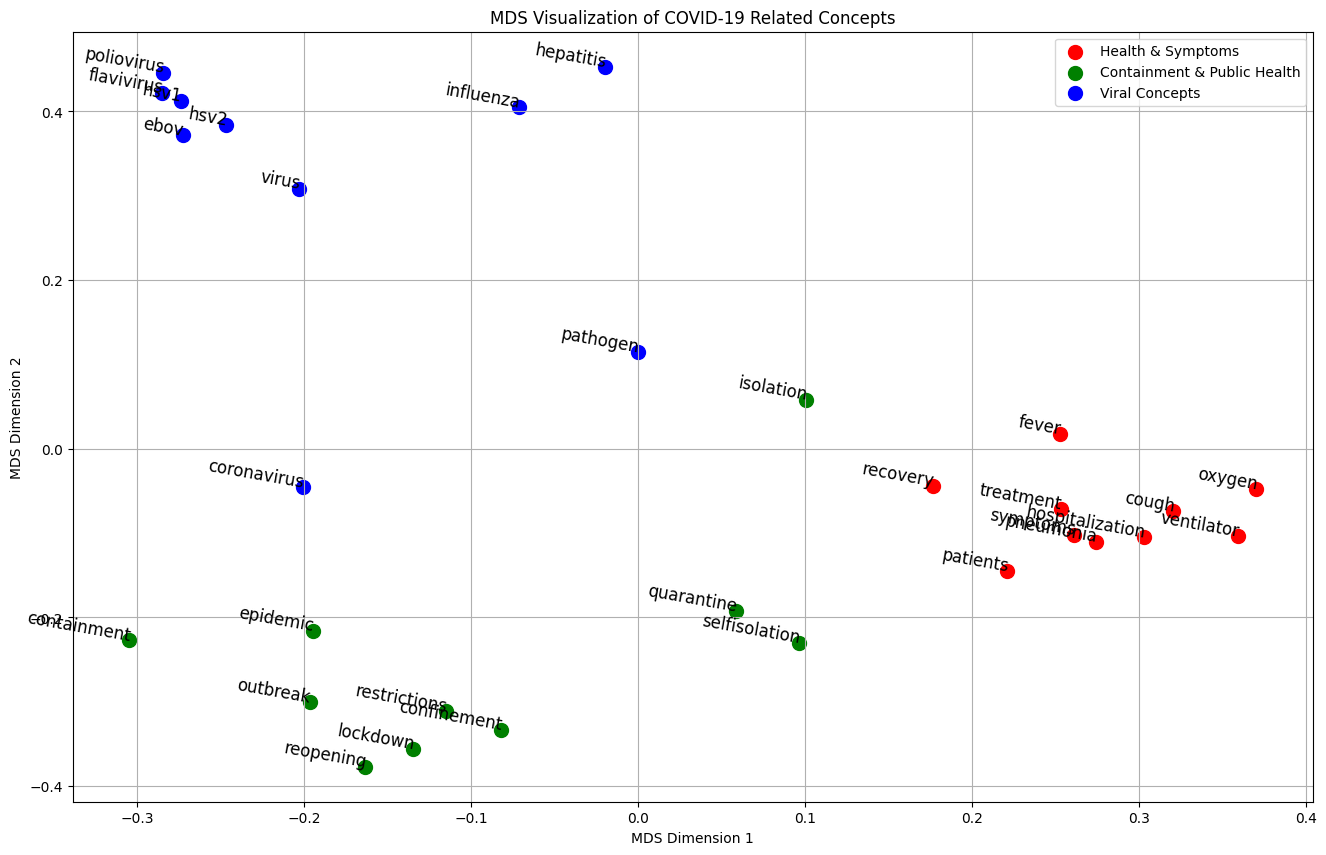

In [ ]:
# @title
categorized_words = {

    "Health & Symptoms": [
        'symptoms', 'hospitalization', 'patients', 'recovery',
        'oxygen', 'ventilator', 'fever', 'cough', 'treatment',
        'pneumonia'
    ],
    "Containment & Public Health": [
        'lockdown', 'quarantine', 'confinement', 'restrictions',
        'reopening', 'outbreak', 'epidemic', 'selfisolation',
        'isolation', 'containment'
    ],
    "Viral Concepts": [
        'virus', 'hsv1', 'poliovirus', 'ebov', 'flavivirus',
        'hsv2', 'coronavirus', 'influenza', 'pathogen', 'hepatitis'
    ]
}

visualize_concepts_with_mds(concepts=categorized_words, vocab=final_voacb_for_coo_mat, co_occurrence_matrix = Probablistis_Coo_Mat_with_argmax,figsize=(16, 10),angle =350)